# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Optical Character Recognition with PyTesseract</h2>

<h5 style="margin-top:5px;">In this lesson we'll implement OCR on a few images using PyTesseract</h5>

##### Source - https://medium.com/@balaajip/optical-character-recognition-99aba2dad314 #####

In [ ]:
# Install PyTessaract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

In [3]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Our First OCR Trial** ###

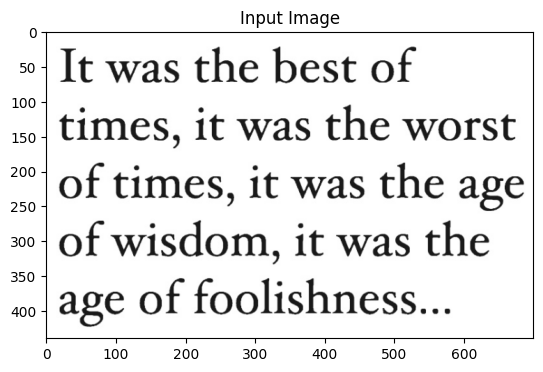

PyTesseract Extracted: It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



In [5]:
img = cv2.imread('../images/OCR_Samples/OCR1.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

### **Does white text on black backgrounds work?** ###

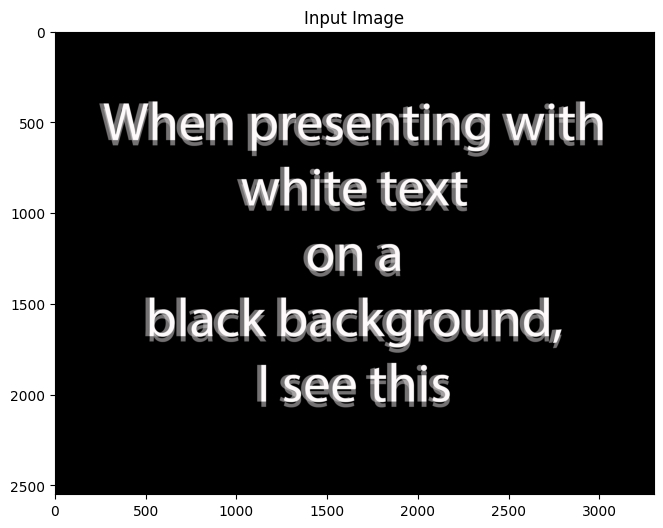

PyTesseract Extracted: When presenting with
white text
ona

black background,
| see this




In [7]:
img = cv2.imread('../images/OCR_Samples/OCR2.jpg')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

### **What about more messy backgrounds?** ###

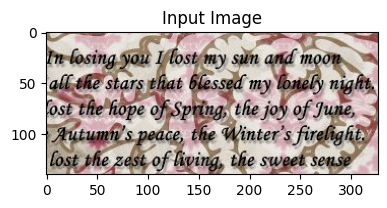

PyTesseract Extracted: Pelosing Mose my sin Kaine wT =
Ge? rod Glesset my loudly nights,
ost the hope SpSpling, the jo} of June,
Aicumls peace, the Winter's firehghty
lost phe zest of Giving, the sweet seusy”



In [8]:
img = cv2.imread('../images/OCR_Samples/OCR3.jpg')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

### **What about a real life scan?** ###

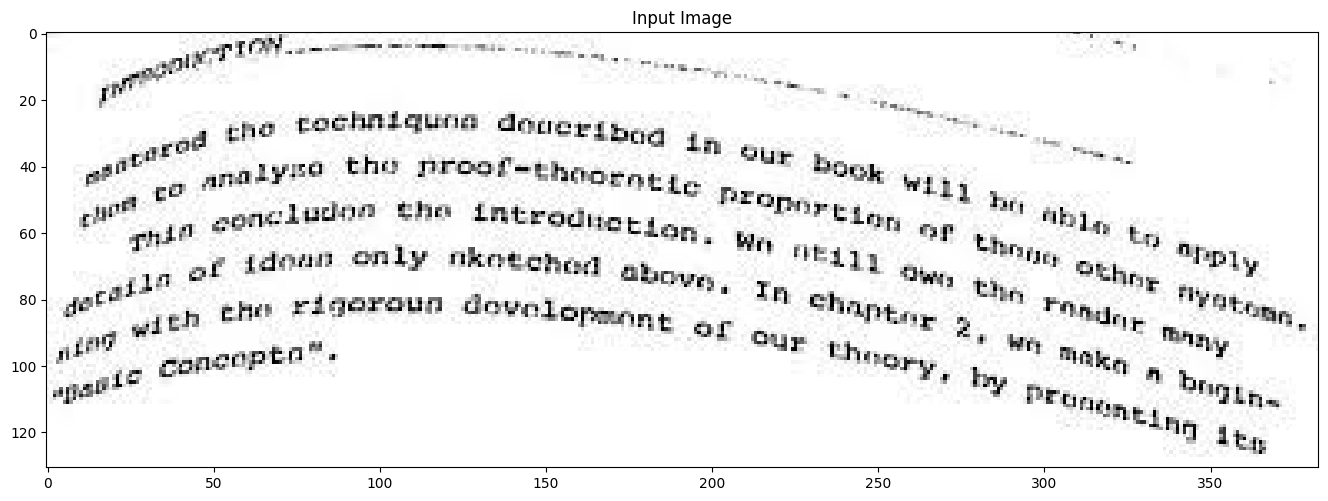

PyTesseract Extracted: oll = ee

‘concapeo" 28 th




In [14]:
img = cv2.imread('../images/OCR_Samples/scan2.jpg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

### **We Need To Clean Up Our Images** ###

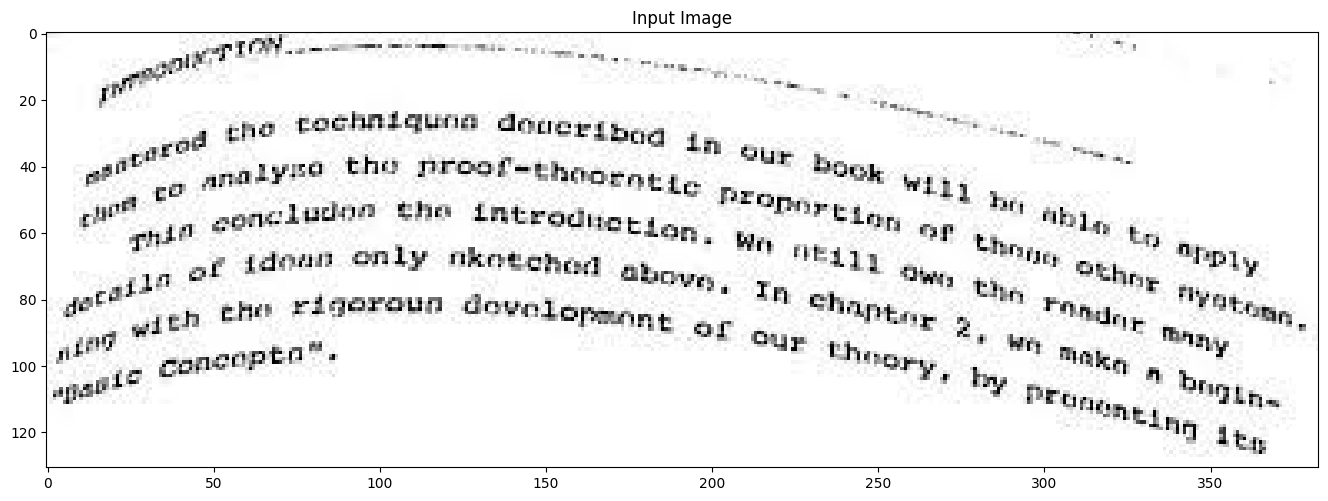

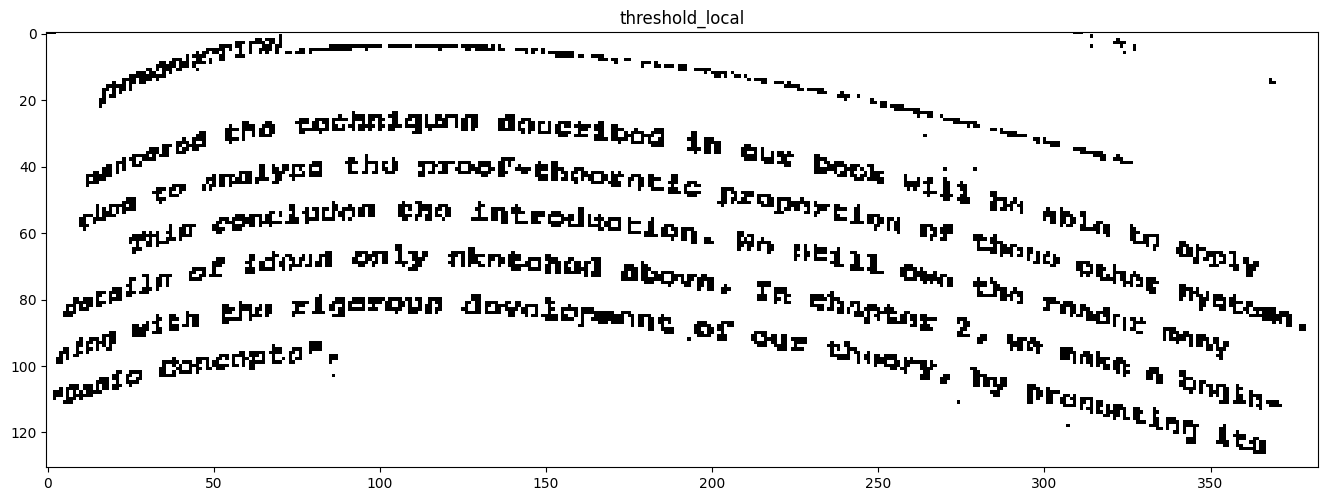

pyTesseract Extracted: an

ia sto costeinesocerteoa gy,
rt yea toe roar en

sai om me rte pps
so cs ents

eine ee on eat

we of cur

in 2
spent Oe



In [21]:
from skimage.filters import threshold_local

image = cv2.imread('../images/OCR_Samples/scan2.jpg')
imshow("Input Image", image, size = 48)

# We get the Value component from the HSV colour space
# then we apply adaptive thresholding
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("pyTesseract Extracted: {}".format(output_txt))

### **Threshold Helps A lot** ###
#### Typically a good preprocessing pipeline for OCR recognition will contain some or more of the following processes:
1. Blurring
2. Thresholding
3. Deskewing
4. Dilation/Erosion/Opening/Closing
5. Noise Removal
####

### **Let's Draw Over Regions Recognized by PyTesseract** ###

In [16]:
# Get our new test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2026-01-03 14:23:13--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2026-01-03 14:23:13--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.01s   

2026-01-03 14:23:14 (8.12 MB/s) - ‘Receipt-woolworth.jp

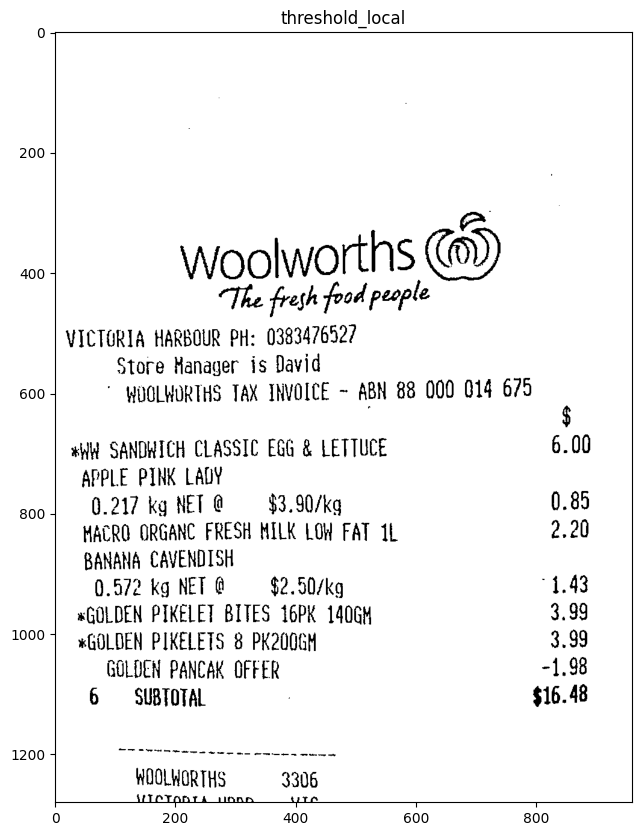

pyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
0.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kG NET @ = $2. 50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2O0GH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ARTA PIAnR



In [24]:
from skimage.filters import threshold_local

image = cv2.imread('../images/OCR_Samples/Receipt-woolworth.jpg')

# We get the value component from the HSV colour space
# then we apply adaptive thresholding
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("pyTesseract Extracted: {}".format(output_txt))

In [25]:
from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


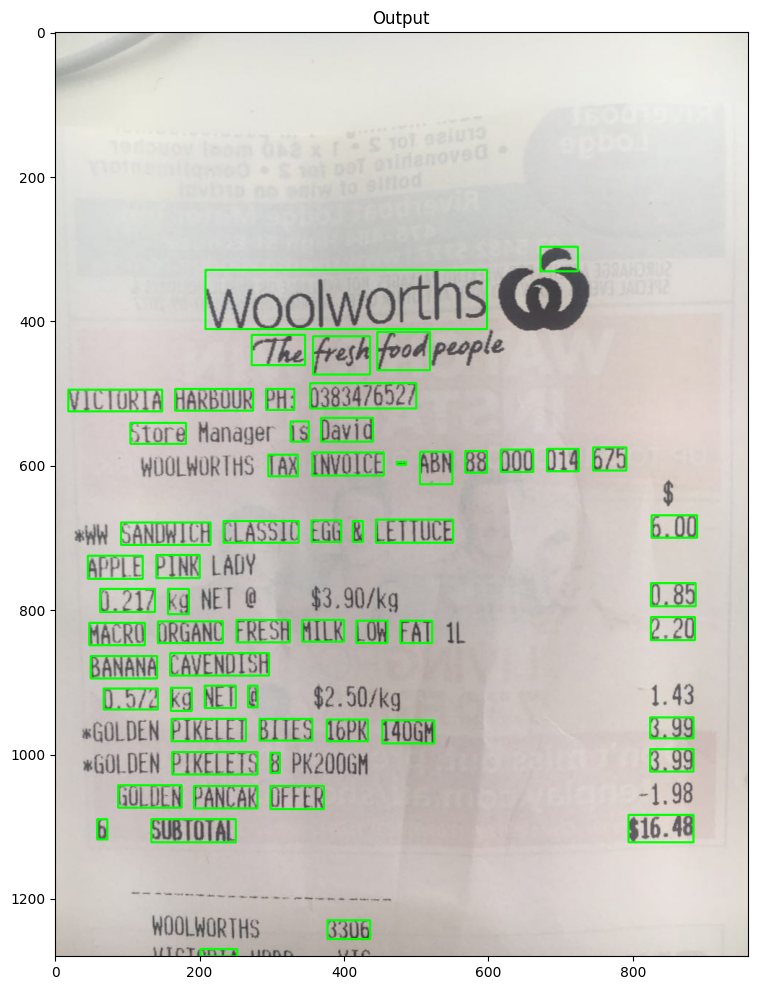

In [26]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', image, size = 12)

### **EASY OCR** ###

In [27]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.2 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 15.5 MB/s  0:01:02m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 10.3 MB/s  0:00:47m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 11.1 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 12.1 MB/s  0:00:07m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 9.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 10.3 MB/s  0:00:59m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 11.8 MB/s  0:00:16m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.4 MB/s  

### **Detect Text in Image and Show our Input Image** ###

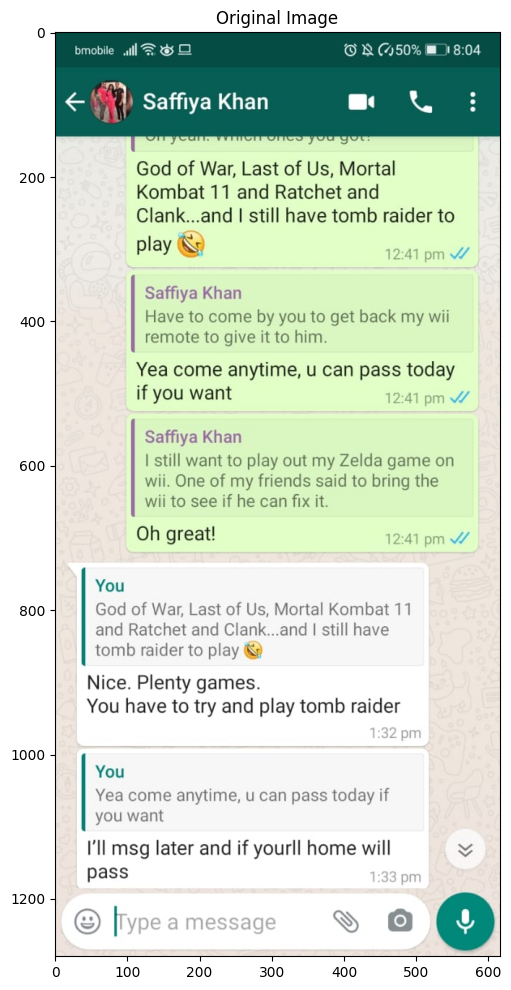

Detecting and OCR'ing text from input image...
Completed in 0.8916928768157959 seconds


In [31]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

# load the input image from disk
image = cv2.imread("../images/OCR_Samples/whatsapp_conv.jpeg")
imshow("Original Image", image, size = 12)

# OCR the oinput image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = True)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [32]:
results

[([[np.int32(24), np.int32(12)],
   [np.int32(192), np.int32(12)],
   [np.int32(192), np.int32(38)],
   [np.int32(24), np.int32(38)]],
  'bmobile ,ill < 82',
  np.float64(0.1144266585067812)),
 ([[np.int32(396), np.int32(12)],
   [np.int32(510), np.int32(12)],
   [np.int32(510), np.int32(38)],
   [np.int32(396), np.int32(38)]],
  '"\'0 ^ (50%',
  np.float64(0.4817148061495196)),
 ([[np.int32(546), np.int32(12)],
   [np.int32(594), np.int32(12)],
   [np.int32(594), np.int32(36)],
   [np.int32(546), np.int32(36)]],
  '8.04',
  np.float64(0.9925674200057983)),
 ([[np.int32(114), np.int32(74)],
   [np.int32(302), np.int32(74)],
   [np.int32(302), np.int32(122)],
   [np.int32(114), np.int32(122)]],
  'Saffiya Khan',
  np.float64(0.7954093942828059)),
 ([[np.int32(110), np.int32(174)],
   [np.int32(200), np.int32(174)],
   [np.int32(200), np.int32(204)],
   [np.int32(110), np.int32(204)]],
  'God of',
  np.float64(0.9898263960668482)),
 ([[np.int32(254), np.int32(173)],
   [np.int32(476), np

### **Display Text Overlaid onto our Image** ###

Probability of Text: 11.443% OCR'd Text: bmobile ,ill < 82
Probability of Text: 48.171% OCR'd Text: "'0 ^ (50%
Probability of Text: 99.257% OCR'd Text: 8.04
Probability of Text: 79.541% OCR'd Text: Saffiya Khan
Probability of Text: 98.983% OCR'd Text: God of
Probability of Text: 90.216% OCR'd Text: Last of Us, Mortal
Probability of Text: 77.197% OCR'd Text: Kombat 11 and Ratchet and
Probability of Text: 88.294% OCR'd Text: Clank__and
Probability of Text: 97.242% OCR'd Text: still have tomb raider to
Probability of Text: 87.334% OCR'd Text: play
Probability of Text: 97.831% OCR'd Text: 12.41 pm
Probability of Text: 99.957% OCR'd Text: Saffiya Khan
Probability of Text: 52.333% OCR'd Text: Have to come by you to get back my wii
Probability of Text: 56.072% OCR'd Text: remote to give it to him:
Probability of Text: 79.276% OCR'd Text: Yea come anytime, U can pass today
Probability of Text: 97.838% OCR'd Text: if you want
Probability of Text: 99.124% OCR'd Text: 1241 pm
Probability of Text:

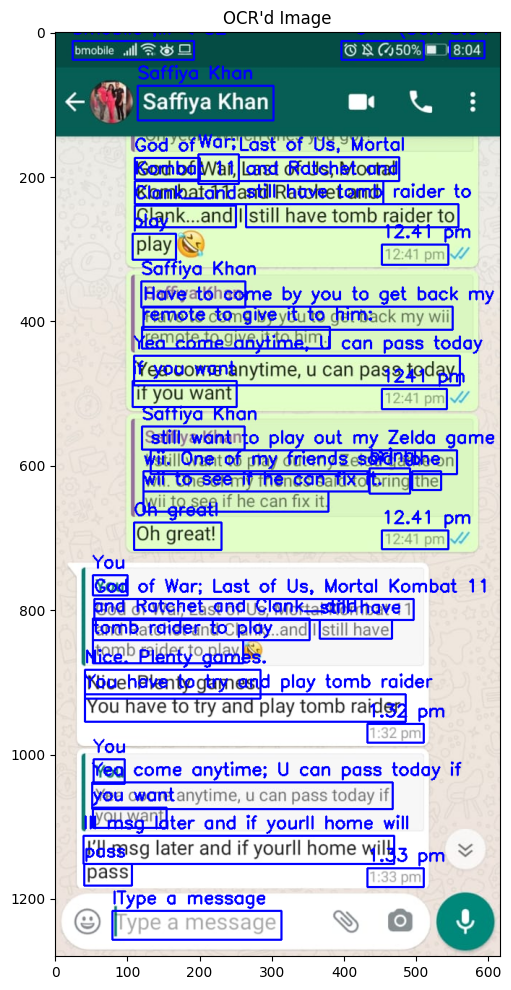

In [33]:
all_text = []

# iterate over our extracted text
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f"Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    
# show the output image
imshow("OCR'd Image", image, size = 12)


### **Run our WoolWorth Receipt** ###

[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0255: 900
[INFO] 0.9308: Woolworths
[INFO] 0.2741: The fregh food
[INFO] 0.6513: VICIURIA HARBOUR PH:  0383476527
[INFO] 0.7154: Store Hanager
[INFO] 0.5599: i$ ٥avid
[INFO] 0.3286: WUULWURIHS IAX INVOICE
[INFO] 0.6950: ABN 88 000 014 675
[INFO] 0.9767: $
[INFO] 0.1904: *Ah SANDHICH CLASSIC EGG & LETIUCE
[INFO] 0.8898: 6. 00
[INFO] 0.6370: APPLE PINK LALV
[INFO] 0.2521: 0. 217 kg N٤٢
[INFO] 0.9515: $3. 90/k9
[INFO] 0.6538: 0. 85
[INFO] 0.5034: HACRO ORGANC FRESH HILK LOW FAT 1l
[INFO] 0.5494: 2. 20
[INFO] 0.9080: BANANA CAVENDISH
[INFO] 0.3010: 0. 572 k ٤٢
[INFO] 0.3617: 0
[INFO] 0.9929: $2
[INFO] 0.9854: 1. 43
[INFO] 0.5336: *GULDEN PIKELEI BIES 16PK 14OGH
[INFO] 0.9192: 3. 99
[INFO] 0.2487: »GOLIEN PIKELETS 8 PK2UUIH
[INFO] 0.9791: 3. 99
[INFO] 0.3799: fULILN PANCAK OFFER
[INFO] 0.5467: -1. 98
[INFO] 0.4510: ٥
[INFO] 0.3240: SUBTUTAL
[INFO] 0.9972: $16.48
[INFO] 0.1767: MOOLWORIHS
[INFO] 0.9998: 3306
[INFO] 0.1213: ٢ ٢١ ٢ ٢ ٨ ٢

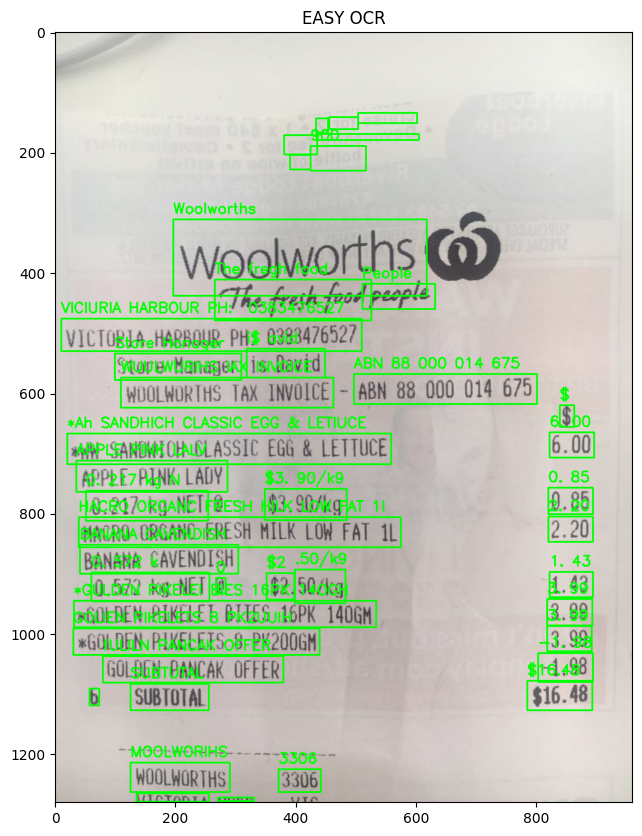

Easy OCR Extracted: .50/k9


In [36]:
import cv2
from easyocr import Reader
import numpy as np
from matplotlib import pyplot as plt

def clean_text(text):
    # remove non-ASCII text so we can draw the text on the image
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread("../images/OCR_Samples/Receipt-woolworth.jpg")

reader = Reader(["en", "ar"], gpu=True)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print("[INFO] {:.4f}: {}".format(prob, text))

    # unpack the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # clean text and draw the box surrounding the text along
    text = clean_text(text)
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
imshow("EASY OCR", image)
print("Easy OCR Extracted: {}".format(text))